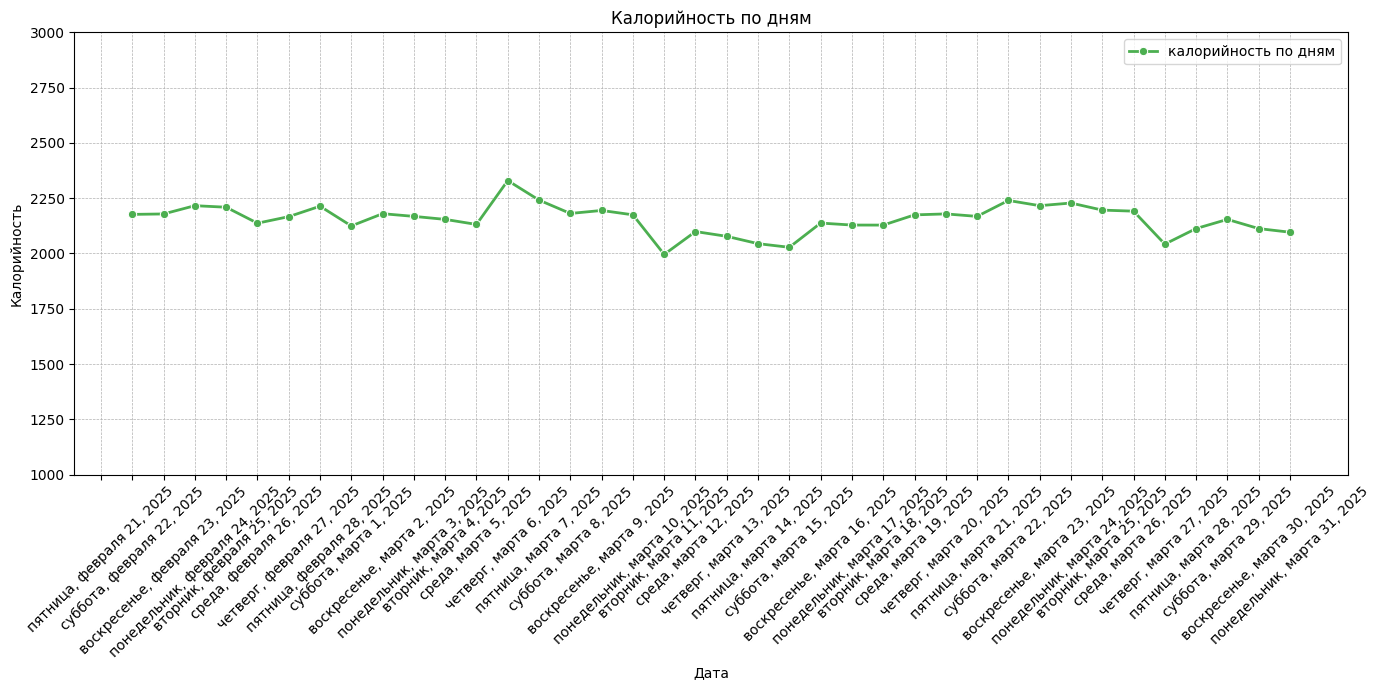

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fat_secret = pd.read_csv('data/filtered_nutrition_data.csv')

fat_secret['Кал ( ккал)'] = fat_secret['Кал ( ккал)'].astype(float)
fat_secret['Белк( г)'] = fat_secret['Белк( г)'].astype(str)
fat_secret['Жир( г)'] = fat_secret['Жир( г)'].astype(str)
fat_secret['Углев( г)'] = fat_secret['Углев( г)'].astype(str)

fat_secret['Smoothed'] = fat_secret['Кал ( ккал)'].rolling(window=5).mean()

# Создание графика
plt.figure(figsize=(14, 7))
sns.lineplot(data=fat_secret, x='Дата', y='Smoothed', marker='o', color='#4CAF50', linewidth=2, label='калорийность по дням')
plt.ylim(1000, 3000)
plt.title('Калорийность по дням')
plt.xlabel('Дата')
plt.ylabel('Калорийность')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()


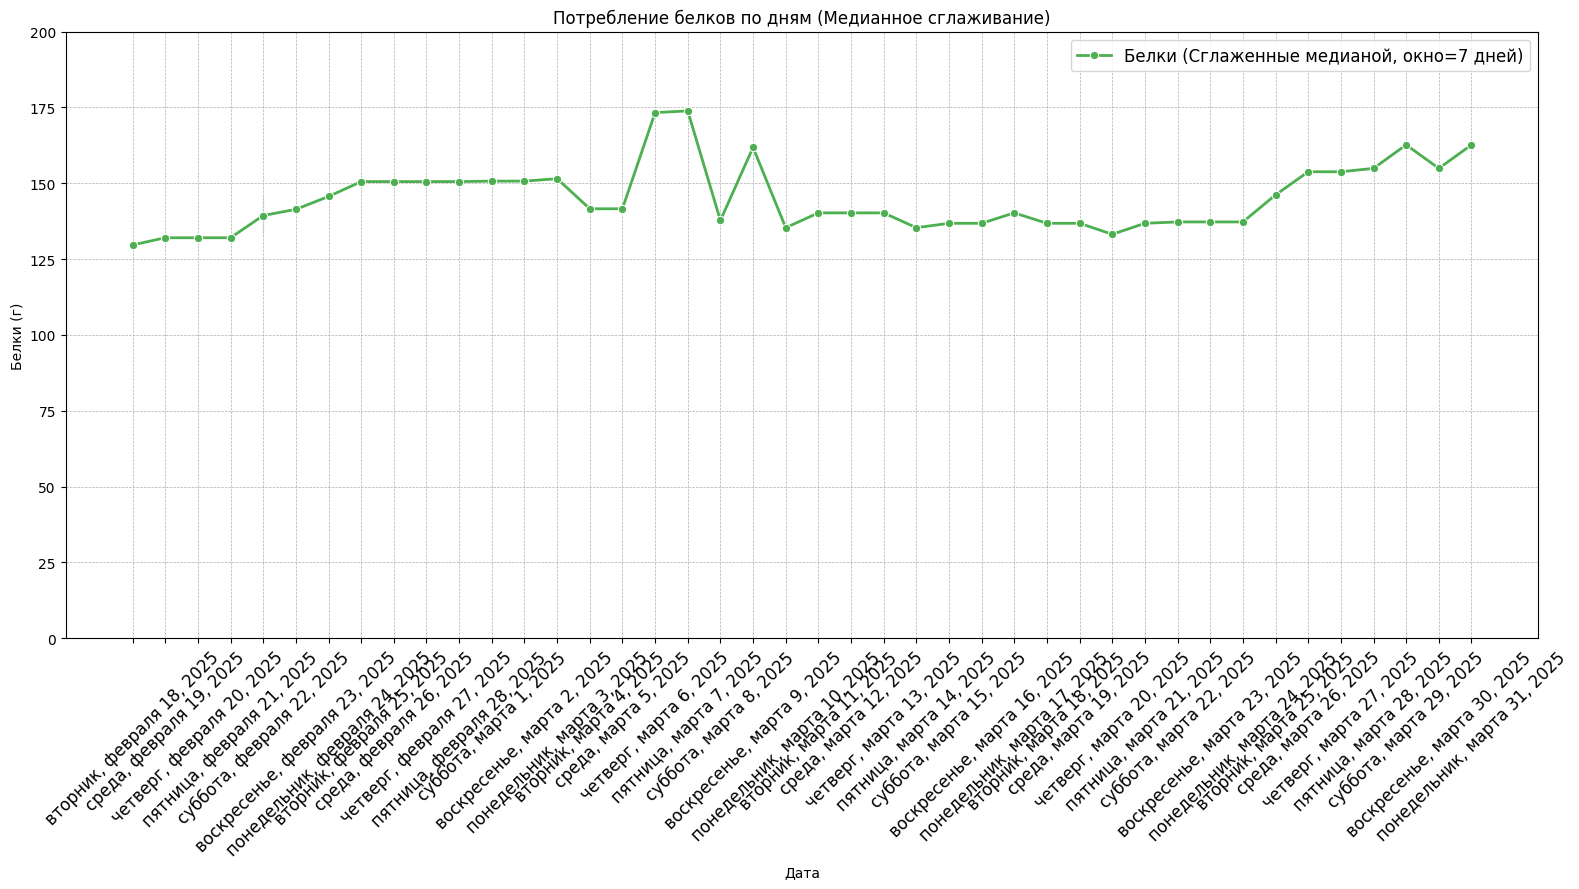

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import median_filter

fat_secret = pd.read_csv('data/filtered_nutrition_data.csv')

fat_secret['Кал ( ккал)'] = fat_secret['Кал ( ккал)'].astype(float)
fat_secret['Белк( г)'] = fat_secret['Белк( г)'].str.replace(',', '.').astype(float)
fat_secret['Жир( г)'] = fat_secret['Жир( г)'].astype(str)
fat_secret['Углев( г)'] = fat_secret['Углев( г)'].astype(str)


window_size = 7  
fat_secret['Белк_Сглаженный'] = median_filter(fat_secret['Белк( г)'], size=window_size)



plt.figure(figsize=(16, 9))  
sns.lineplot(data=fat_secret, x='Дата', y='Белк_Сглаженный', marker='o', color='#4CAF50', linewidth=2, label=f'Белки (Сглаженные медианой, окно={window_size} дней)')

plt.ylim(0, 200)
plt.title('Потребление белков по дням (Медианное сглаживание)')
plt.xlabel('Дата')
plt.ylabel('Белки (г)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.xticks(rotation=45, fontsize=12)

plt.legend(fontsize=12)
plt.tight_layout()

plt.show()